# Regularization

## Marcin Biela, 302959


In [1794]:
# Imports
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston, load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [1795]:
# Boston data Loading
boston = load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [1796]:
# Boston keys and shape
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)


In [1797]:
# Boston dataset description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [1798]:
# Poston features name
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [1799]:
# Devide a Feature and Target Dataframes
X_boston = pd.DataFrame(boston.data)
Y_boston = pd.DataFrame(boston.target)

X_boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [1800]:
# Creating train and test subdatasets

X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, test_size=0.2, random_state=15)

In [1801]:
# Checking if division is correct
print(X_boston.shape[0])
print(float(X_train.shape[0]) / float(X_boston.shape[0]))
print(float(X_test.shape[0]) / float(X_boston.shape[0]))

506
0.7984189723320159
0.2015810276679842


Ex 2 Linear Reggresion

In [1802]:
# Creating LinearRegression model
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)
score = reg.score(X_train, Y_train)

Y_pred = reg.predict(X_test)

print("predict: ", Y_pred)

predict:  [[28.80383915]
 [40.26470606]
 [23.1629741 ]
 [22.73903454]
 [26.60248165]
 [ 6.78850771]
 [17.98737207]
 [12.90645395]
 [28.13880473]
 [15.96300504]
 [17.58476405]
 [22.54993315]
 [15.57583198]
 [16.42813922]
 [20.85701954]
 [14.4238478 ]
 [ 8.59570996]
 [ 7.00268049]
 [21.90974047]
 [10.41836313]
 [38.99970045]
 [13.10069505]
 [23.60170542]
 [19.36745226]
 [19.4704504 ]
 [19.44473926]
 [26.81161139]
 [21.94644687]
 [19.910743  ]
 [19.55839769]
 [21.33408116]
 [ 7.97494586]
 [20.91117634]
 [20.17838513]
 [23.55157079]
 [19.3060909 ]
 [24.34755999]
 [28.33114956]
 [20.98210245]
 [18.08903855]
 [28.5614124 ]
 [36.5386986 ]
 [20.20828082]
 [27.06956955]
 [26.23745421]
 [21.00792914]
 [21.1962516 ]
 [30.55209364]
 [24.88050603]
 [20.75515688]
 [30.57871029]
 [15.35275076]
 [14.12154202]
 [13.92054419]
 [17.58306333]
 [30.23390841]
 [ 7.78156918]
 [29.50907892]
 [16.69885153]
 [26.35705786]
 [17.51457779]
 [27.86328712]
 [18.91817276]
 [29.7953683 ]
 [34.10098499]
 [20.5512098 ]


In [1803]:
print(Y_pred.shape)

(102, 1)


In [1804]:
print(Y_train.shape)

(404, 1)


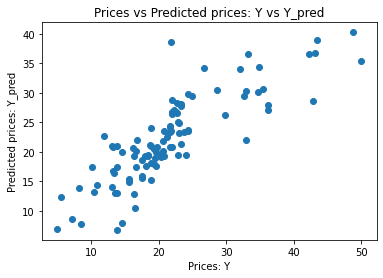

In [1805]:
# Ploting real prices and predicted prices
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred)
ax.set_xlabel("Prices: Y")
ax.set_ylabel("Predicted prices: Y_pred")
ax.set_title("Prices vs Predicted prices: Y vs Y_pred")
plt.show()

In [1806]:
# Mean squered erros -  MSE
MSE = mean_squared_error(Y_test, Y_pred)

print("MSE: ", MSE)

MSE:  23.81224546508056


In [1807]:
# Model Score
score = reg.score(X_test, Y_test)
print(f"score: {score}")

score: 0.6920749038652159


In [1808]:
# Data normalization using StandardScaler
scaler = StandardScaler()
X_boston_scaled = scaler.fit_transform(X_boston)


# Creating train and test subdatasets
X_train, X_test, Y_train, Y_test = train_test_split(X_boston_scaled, Y_boston, test_size=0.2, random_state=15)


In [1809]:
# Polynomial features
poly_model = PolynomialFeatures(degree=2)
X_train = poly_model.fit_transform(X_train)
X_test = poly_model.fit_transform(X_test)

In [1810]:
# Comparison reggression models and their coefficients

lin_reggression2 = LinearRegression()
lin_reggression2.fit(X_train, Y_train)
Y_pred_scaled = lin_reggression2.predict(X_test)

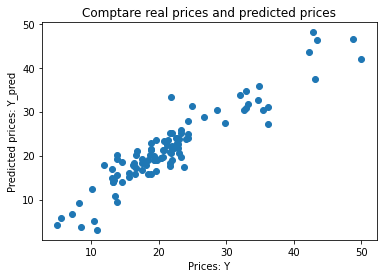

In [1811]:
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred_scaled)
ax.set_xlabel("Prices: Y")
ax.set_ylabel("Predicted prices: Y_pred")
ax.set_title("Comptare real prices and predicted prices")
plt.show()

In [1812]:
# Mean Squared Error after scaling
MSE_scaled = mean_squared_error(Y_test, Y_pred_scaled)

print(f"MSE: {MSE_scaled}")

MSE: 10.327131188617034


In [1813]:
# Model Score
score_scaled = lin_reggression2.score(X_test, Y_pred_scaled)
print(f"score: {score_scaled}")

score: 1.0


In [1814]:
# Lasso model

lasso_measure = Lasso(alpha=0.1)
lasso_measure.fit(X_train, Y_train)
y_pred_lasso = lasso_measure.predict(X_test)

print(f"Lassor score: {lasso_measure.score(X_test, Y_test)}")


Lassor score: 0.7558665001028636


In [1815]:
# Lasso tested by alpha parameter

alpha_values = [10**i for i in range(-4, 4)]
score_lasso_values = [] # result

for el in alpha_values:
    lasso_tmp = Lasso(alpha=el)
    lasso_tmp.fit(X_train, Y_train)
    score_tmp = lasso_tmp.score(X_train, Y_train)
    score_lasso_values.append(score_tmp)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.182e+03, tolerance: 3.472e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.703e+02, tolerance: 3.472e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.381e+01, toleranc

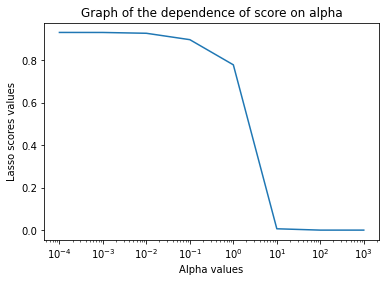

In [1816]:
# Dependency lasso score of alpha parameter
fig, ax = plt.subplots()
ax.semilogx(alpha_values, score_lasso_values)
ax.set_xlabel("Alpha values")
ax.set_ylabel("Lasso scores values")
ax.set_title("Graph of the dependence of score on alpha")
plt.show()

In [1817]:
# Ridge model
ridge_measure = Lasso(alpha=0.1)
ridge_measure.fit(X_train, Y_train)
y_pred_ridge = ridge_measure.predict(X_test)

print(f"Ridge score: {ridge_measure.score(X_test, Y_test)}")

Ridge score: 0.7558665001028636


In [1818]:
# Ridge tested by alpha parameter

alpha_values = [10**i for i in range(-1, 7)]
score_ridge_values = [] # result

for el in alpha_values:
    ridge_tmp = Ridge(alpha=el)
    ridge_tmp.fit(X_train, Y_train)
    score_tmp = ridge_tmp.score(X_train, Y_train)
    score_ridge_values.append(score_tmp)

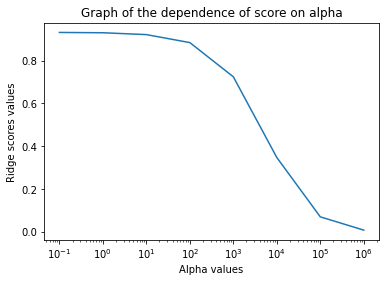

In [1819]:
# Dependency ridge score of alpha parameter
fig, ax = plt.subplots()
ax.semilogx(alpha_values, score_ridge_values)
ax.set_xlabel("Alpha values")
ax.set_ylabel("Ridge scores values")
ax.set_title("Graph of the dependence of score on alpha")
plt.show()

## Regularization for logistic regression

In [1820]:
# Loading cancer dataset
data = load_breast_cancer()
data_cancer = pd.DataFrame(data.data)

# checking if dataset has null values
data_cancer.isnull().isnull().value_counts()

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29   
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False    569
dtype: int64

In [1821]:
# Devide dataset into training and testing

data_cancer.columns = data.feature_names
y_cancer = data.target

X_train, X_test, Y_train, Y_test = train_test_split(data_cancer, y_cancer, test_size=0.2, random_state=15)

In [1822]:
# Logistic reggresion with regularization L1 and C = 1 regularization parameter
logistic_reg = LogisticRegression(penalty="l1", C=1, solver='liblinear', max_iter=50000)
logistic_reg.fit(X_train, Y_train)
Y_pred = logistic_reg.predict(X_test)

score_cancer = logistic_reg.score(X_test, Y_test)
print(f"Logistic reg score: {round(score_cancer, 4)}")

Logistic reg score: 0.8947


In [1823]:
# Dependency graph: score by C value
C_values = [10**i for i in range(-5, 2, 1)]
score_C_values = [] # result

for el in C_values:
    log_reg_tmp = LogisticRegression(penalty="l2", C=el, max_iter=1e4)
    log_reg_tmp.fit(X_train, Y_train)
    score_tmp = log_reg_tmp.score(X_train, Y_train)
    score_C_values.append(score_tmp)


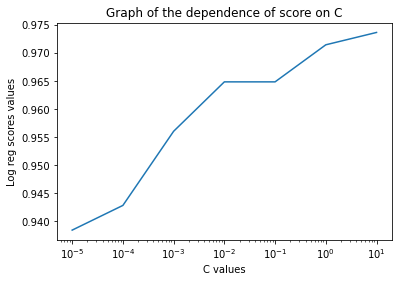

In [1824]:
fig, ax = plt.subplots()
ax.semilogx(C_values, score_C_values)
ax.set_xlabel("C values")
ax.set_ylabel("Log reg scores values")
ax.set_title("Graph of the dependence of score on C")
plt.show()

In [1825]:
# Dependency accuraccy from k neighbours for KNN method

k_values = [i for i in range(1,152)]
acc_values = []

for k in k_values:
    knn_tmp = KNeighborsClassifier(n_neighbors = k)
    knn_tmp.fit(X_train, Y_train)
    y_pred = knn_tmp.predict(X_test)
    acc_values.append(accuracy_score(Y_test, y_pred))


print(f"Max accuraccy {round(max(acc_values), 4)} is for k = {acc_values.index(max(acc_values))}")


Max accuraccy 0.9123 is for k = 2


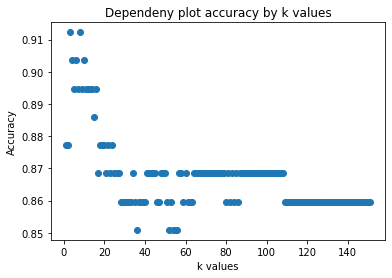

In [1826]:
fig, ax = plt.subplots()
ax.scatter(k_values, acc_values)
ax.set_xlabel(f"k values")
ax.set_ylabel(f"Accuracy")
ax.set_title(f"Dependeny plot accuracy by k values")
plt.show()

## Decision Tree optimalization

In [1827]:
# Dependency accuraccy of tree depth for decision Tree

depth_values = [i for i in range(1,152)]
acc_values = []

for d in depth_values:
    tree_tmp = DecisionTreeClassifier(max_depth=d)
    tree_tmp.fit(X_train, Y_train)
    y_pred = tree_tmp.predict(X_test)
    acc_values.append(accuracy_score(Y_test, y_pred))


print(f"Max accuraccy {round(max(acc_values), 4)} is for depth = {acc_values.index(max(acc_values))}")

Max accuraccy 0.9561 is for depth = 3


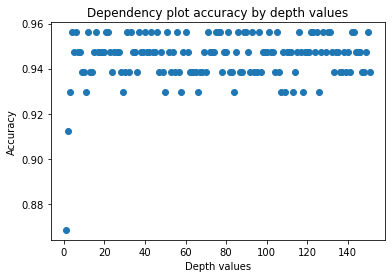

In [1828]:
fig, ax = plt.subplots()
ax.scatter(depth_values, acc_values)
ax.set_xlabel(f"Depth values")
ax.set_ylabel(f"Accuracy")
ax.set_title(f"Dependency plot accuracy by depth values")
plt.show()